In [60]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('bank-additional-full.csv')

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [5]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [6]:
for x in df.columns:
    if df.dtypes[x] == np.object:
        print(x , "\n" , df[x].value_counts())
        print( "--------------------------------------")

job 
 admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64
--------------------------------------
marital 
 married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64
--------------------------------------
education 
 university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64
--------------------------------------
default 
 no         32588
unknown     8597
yes            3
Name: default, dtype: int64
--------------------------------------
housing 
 yes        21576
no         18622
unknown      990
Name

In [193]:
df.dtypes["job"] == np.object

False

In [194]:
df.previous.value_counts()

0    35563
1     4561
2      754
3      216
4       70
5       18
6        5
7        1
Name: previous, dtype: int64

In [7]:

cols = []
for x in df.columns:
    if df.dtypes[x] == np.object:
        cols == cols.append(x)
cols

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome',
 'y']

In [275]:
#dont run
from sklearn.preprocessing import LabelEncoder
lenc = LabelEncoder()
for i in range (0 , len(cols)):
    df[cols[i]] = lenc.fit_transform(df[cols[i]])

In [10]:
#convert
ordc = OrdinalEncoder()
df[cols] = ordc.fit_transform(df[cols])
df


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3.0,1.0,0.0,0.0,0.0,0.0,1.0,6.0,1.0,...,1,999,0,1.0,1.1,93.994,-36.4,4.857,5191.0,0.0
1,57,7.0,1.0,3.0,1.0,0.0,0.0,1.0,6.0,1.0,...,1,999,0,1.0,1.1,93.994,-36.4,4.857,5191.0,0.0
2,37,7.0,1.0,3.0,0.0,2.0,0.0,1.0,6.0,1.0,...,1,999,0,1.0,1.1,93.994,-36.4,4.857,5191.0,0.0
3,40,0.0,1.0,1.0,0.0,0.0,0.0,1.0,6.0,1.0,...,1,999,0,1.0,1.1,93.994,-36.4,4.857,5191.0,0.0
4,56,7.0,1.0,3.0,0.0,0.0,2.0,1.0,6.0,1.0,...,1,999,0,1.0,1.1,93.994,-36.4,4.857,5191.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,5.0,1.0,5.0,0.0,2.0,0.0,0.0,7.0,0.0,...,1,999,0,1.0,-1.1,94.767,-50.8,1.028,4963.6,1.0
41184,46,1.0,1.0,5.0,0.0,0.0,0.0,0.0,7.0,0.0,...,1,999,0,1.0,-1.1,94.767,-50.8,1.028,4963.6,0.0
41185,56,5.0,1.0,6.0,0.0,2.0,0.0,0.0,7.0,0.0,...,2,999,0,1.0,-1.1,94.767,-50.8,1.028,4963.6,0.0
41186,44,9.0,1.0,5.0,0.0,0.0,0.0,0.0,7.0,0.0,...,1,999,0,1.0,-1.1,94.767,-50.8,1.028,4963.6,1.0


In [9]:
#revert
df[cols] = ordc.inverse_transform(df[cols])
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [11]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3.0,1.0,0.0,0.0,0.0,0.0,1.0,6.0,1.0,...,1,999,0,1.0,1.1,93.994,-36.4,4.857,5191.0,0.0
1,57,7.0,1.0,3.0,1.0,0.0,0.0,1.0,6.0,1.0,...,1,999,0,1.0,1.1,93.994,-36.4,4.857,5191.0,0.0
2,37,7.0,1.0,3.0,0.0,2.0,0.0,1.0,6.0,1.0,...,1,999,0,1.0,1.1,93.994,-36.4,4.857,5191.0,0.0
3,40,0.0,1.0,1.0,0.0,0.0,0.0,1.0,6.0,1.0,...,1,999,0,1.0,1.1,93.994,-36.4,4.857,5191.0,0.0
4,56,7.0,1.0,3.0,0.0,0.0,2.0,1.0,6.0,1.0,...,1,999,0,1.0,1.1,93.994,-36.4,4.857,5191.0,0.0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  float64
 2   marital         41188 non-null  float64
 3   education       41188 non-null  float64
 4   default         41188 non-null  float64
 5   housing         41188 non-null  float64
 6   loan            41188 non-null  float64
 7   contact         41188 non-null  float64
 8   month           41188 non-null  float64
 9   day_of_week     41188 non-null  float64
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  float64
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [13]:
info = {'count': df.y.value_counts(), 'percentage': df.y.value_counts(normalize=True)}
pd.DataFrame(data=info )

,count,percentage
0.0,36548,0.887346
1.0,4640,0.112654


<AxesSubplot:>

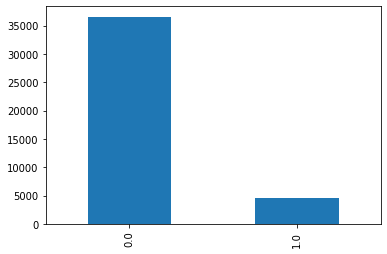

In [14]:
df.y.value_counts().plot(kind = "bar")

In [170]:
# we can clearly see that the data is imbalanced (89% no and 11% yes) so we need to handle it
# we will try 3 common methods and then choose the best

#Hadling imbalanced data

In [16]:
X = df.iloc[:, :-1]
y = df.iloc[: ,-1]

In [17]:
y

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
41183    1.0
41184    0.0
41185    0.0
41186    1.0
41187    0.0
Name: y, Length: 41188, dtype: float64

In [18]:
imbancedDf = pd.DataFrame(data= {"method" : "no method applied" , "X-shape" : [X.shape[0]] , "y_shape" :[ y.shape[0]] , "y_yes" :y.value_counts()[1], "y_no" :y.value_counts()[0]})
imbancedDf

,method,X-shape,y_shape,y_yes,y_no
0,no method applied,41188,41188,4640,36548


1-undersampling

In [19]:
from imblearn.under_sampling import NearMiss
nms = NearMiss(version=3 , n_neighbors=3)
xus , yus = nms.fit_resample(X , y)

In [ ]:
NearMiss?

In [20]:
for i in (xus , yus):
    print(i.shape[0])
print(i.value_counts())

9280
9280
0.0    4640
1.0    4640
Name: y, dtype: int64


In [21]:
undersamplingRow = {"method" : "underSampling with NearMiss" , "X-shape" : xus.shape[0] , "y_shape" : yus.shape[0] , "y_yes" :yus.value_counts()[1], "y_no" :yus.value_counts()[0]}
imbancedDf = imbancedDf.append(undersamplingRow , ignore_index=True)
imbancedDf


,method,X-shape,y_shape,y_yes,y_no
0,no method applied,41188,41188,4640,36548
1,underSampling with NearMiss,9280,9280,4640,4640


In [22]:
from imblearn.over_sampling import RandomOverSampler
ros =RandomOverSampler()
xos , yos = ros.fit_resample(X , y)


In [23]:
yos.shape

(73096,)

In [24]:
imbancedDf

,method,X-shape,y_shape,y_yes,y_no
0,no method applied,41188,41188,4640,36548
1,underSampling with NearMiss,9280,9280,4640,4640


2- oversampling

In [25]:
oversamplingRow = {"method" : "oversampling with RandomOverSampler" , "X-shape" : xos.shape[0] , "y_shape" : yos.shape[0] , "y_yes" :yos.value_counts()[1], "y_no" :yos.value_counts()[0]}
imbancedDf =imbancedDf .append(oversamplingRow , ignore_index=True)
imbancedDf

,method,X-shape,y_shape,y_yes,y_no
0,no method applied,41188,41188,4640,36548
1,underSampling with NearMiss,9280,9280,4640,4640
2,oversampling with RandomOverSampler,73096,73096,36548,36548


3 - SMOTE

In [26]:
from imblearn.over_sampling import SMOTE
smot = SMOTE(sampling_strategy="minority")
xsm , ysm = smot.fit_resample(X , y)

In [27]:
smotoversamplingRow = {"method" : "SMOTE" , "X-shape" : xsm.shape[0] , "y_shape" : ysm.shape[0] , "y_yes" :ysm.value_counts()[1], "y_no" :ysm.value_counts()[0]}
imbancedDf =imbancedDf .append(smotoversamplingRow , ignore_index=True)
imbancedDf

,method,X-shape,y_shape,y_yes,y_no
0,no method applied,41188,41188,4640,36548
1,underSampling with NearMiss,9280,9280,4640,4640
2,oversampling with RandomOverSampler,73096,73096,36548,36548
3,SMOTE,73096,73096,36548,36548


In [28]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3.0,1.0,0.0,0.0,0.0,0.0,1.0,6.0,1.0,...,1,999,0,1.0,1.1,93.994,-36.4,4.857,5191.0,0.0
1,57,7.0,1.0,3.0,1.0,0.0,0.0,1.0,6.0,1.0,...,1,999,0,1.0,1.1,93.994,-36.4,4.857,5191.0,0.0
2,37,7.0,1.0,3.0,0.0,2.0,0.0,1.0,6.0,1.0,...,1,999,0,1.0,1.1,93.994,-36.4,4.857,5191.0,0.0
3,40,0.0,1.0,1.0,0.0,0.0,0.0,1.0,6.0,1.0,...,1,999,0,1.0,1.1,93.994,-36.4,4.857,5191.0,0.0
4,56,7.0,1.0,3.0,0.0,0.0,2.0,1.0,6.0,1.0,...,1,999,0,1.0,1.1,93.994,-36.4,4.857,5191.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,5.0,1.0,5.0,0.0,2.0,0.0,0.0,7.0,0.0,...,1,999,0,1.0,-1.1,94.767,-50.8,1.028,4963.6,1.0
41184,46,1.0,1.0,5.0,0.0,0.0,0.0,0.0,7.0,0.0,...,1,999,0,1.0,-1.1,94.767,-50.8,1.028,4963.6,0.0
41185,56,5.0,1.0,6.0,0.0,2.0,0.0,0.0,7.0,0.0,...,2,999,0,1.0,-1.1,94.767,-50.8,1.028,4963.6,0.0
41186,44,9.0,1.0,5.0,0.0,0.0,0.0,0.0,7.0,0.0,...,1,999,0,1.0,-1.1,94.767,-50.8,1.028,4963.6,1.0


3- SMOTE

In [ ]:
np.r_?

In [319]:
xos

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,3.0,1.0,0.0,0.0,0.0,0.0,1.0,6.0,1.0,261,1,999,0,1.0,1.1,93.994,-36.4,4.857,5191.0
1,57,7.0,1.0,3.0,1.0,0.0,0.0,1.0,6.0,1.0,149,1,999,0,1.0,1.1,93.994,-36.4,4.857,5191.0
2,37,7.0,1.0,3.0,0.0,2.0,0.0,1.0,6.0,1.0,226,1,999,0,1.0,1.1,93.994,-36.4,4.857,5191.0
3,40,0.0,1.0,1.0,0.0,0.0,0.0,1.0,6.0,1.0,151,1,999,0,1.0,1.1,93.994,-36.4,4.857,5191.0
4,56,7.0,1.0,3.0,0.0,0.0,2.0,1.0,6.0,1.0,307,1,999,0,1.0,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73091,36,9.0,2.0,5.0,0.0,0.0,0.0,0.0,1.0,1.0,444,3,999,0,1.0,1.4,93.444,-36.1,4.965,5228.1
73092,43,1.0,1.0,0.0,0.0,2.0,0.0,0.0,6.0,3.0,1182,1,999,1,0.0,-1.8,92.893,-46.2,1.291,5099.1
73093,51,0.0,1.0,6.0,0.0,2.0,0.0,0.0,1.0,4.0,519,9,999,0,1.0,1.4,93.444,-36.1,4.964,5228.1
73094,36,6.0,1.0,2.0,0.0,2.0,2.0,0.0,6.0,3.0,731,1,999,0,1.0,-1.8,92.893,-46.2,1.344,5099.1


In [42]:
osdf = pd.concat([xos ,yos] , axis=1)
osdf 

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3.0,1.0,0.0,0.0,0.0,0.0,1.0,6.0,1.0,...,1,999,0,1.0,1.1,93.994,-36.4,4.857,5191.0,0.0
1,57,7.0,1.0,3.0,1.0,0.0,0.0,1.0,6.0,1.0,...,1,999,0,1.0,1.1,93.994,-36.4,4.857,5191.0,0.0
2,37,7.0,1.0,3.0,0.0,2.0,0.0,1.0,6.0,1.0,...,1,999,0,1.0,1.1,93.994,-36.4,4.857,5191.0,0.0
3,40,0.0,1.0,1.0,0.0,0.0,0.0,1.0,6.0,1.0,...,1,999,0,1.0,1.1,93.994,-36.4,4.857,5191.0,0.0
4,56,7.0,1.0,3.0,0.0,0.0,2.0,1.0,6.0,1.0,...,1,999,0,1.0,1.1,93.994,-36.4,4.857,5191.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73091,53,3.0,1.0,0.0,0.0,2.0,0.0,0.0,4.0,3.0,...,2,999,0,1.0,-2.9,92.963,-40.8,1.252,5076.2,1.0
73092,28,0.0,2.0,6.0,0.0,0.0,0.0,0.0,3.0,2.0,...,2,999,0,1.0,1.4,93.918,-42.7,4.968,5228.1,1.0
73093,26,9.0,2.0,5.0,0.0,0.0,0.0,0.0,3.0,2.0,...,3,999,2,0.0,-1.7,94.215,-40.3,0.899,4991.6,1.0
73094,50,0.0,1.0,3.0,0.0,2.0,0.0,0.0,8.0,2.0,...,1,999,0,1.0,-1.1,94.601,-49.5,0.987,4963.6,1.0


In [43]:

len(ordc.inverse_transform(osdf[cols]))


73096

In [44]:
osdf[cols] = ordc.inverse_transform(osdf[cols])


In [46]:
#obersampled DAta Frame
osdf =pd.DataFrame(osdf)
osdf

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73091,53,housemaid,married,basic.4y,no,yes,no,cellular,jun,tue,...,2,999,0,nonexistent,-2.9,92.963,-40.8,1.252,5076.2,yes
73092,28,admin.,single,university.degree,no,no,no,cellular,jul,thu,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,yes
73093,26,technician,single,professional.course,no,no,no,cellular,jul,thu,...,3,999,2,failure,-1.7,94.215,-40.3,0.899,4991.6,yes
73094,50,admin.,married,high.school,no,yes,no,cellular,oct,thu,...,1,999,0,nonexistent,-1.1,94.601,-49.5,0.987,4963.6,yes


In [48]:
#undersampled DataFrame
usdf = pd.concat([xus ,yus] , axis=1)
usdf[cols] = ordc.inverse_transform(usdf[cols])
usdf =pd.DataFrame(usdf)
usdf

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,33,technician,single,professional.course,no,yes,no,telephone,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.406,5195.8,no
1,27,admin.,single,high.school,no,no,no,telephone,aug,fri,...,1,999,0,nonexistent,-1.7,94.027,-38.3,0.888,4991.6,no
2,39,self-employed,married,basic.4y,unknown,yes,no,telephone,may,tue,...,3,999,0,nonexistent,1.1,93.994,-36.4,4.856,5191.0,no
3,47,management,married,high.school,no,no,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.968,5228.1,no
4,27,blue-collar,single,professional.course,no,yes,no,telephone,oct,mon,...,1,999,0,nonexistent,-0.1,93.798,-40.4,4.912,5195.8,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9275,62,retired,married,university.degree,no,yes,no,cellular,nov,thu,...,1,1,6,success,-1.1,94.767,-50.8,1.031,4963.6,yes
9276,62,retired,married,university.degree,no,no,no,cellular,nov,thu,...,2,6,3,success,-1.1,94.767,-50.8,1.031,4963.6,yes
9277,37,admin.,married,university.degree,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
9278,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [49]:
#SMOTE DataFrame
smdf = pd.concat([xsm ,ysm] , axis=1)
smdf[cols] = ordc.inverse_transform(smdf[cols])
smdf =pd.DataFrame(smdf)
smdf

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.100000,93.994000,-36.400000,4.857000,5191.00000,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.100000,93.994000,-36.400000,4.857000,5191.00000,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.100000,93.994000,-36.400000,4.857000,5191.00000,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.100000,93.994000,-36.400000,4.857000,5191.00000,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.100000,93.994000,-36.400000,4.857000,5191.00000,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73091,55,management,married,university.degree,no,yes,no,cellular,dec,fri,...,2,999,0,nonexistent,-1.800000,93.002139,-46.739699,1.384583,5099.10000,yes
73092,50,entrepreneur,married,university.degree,no,yes,no,cellular,aug,tue,...,6,999,0,nonexistent,1.400000,93.444000,-36.100000,4.965081,5228.10000,yes
73093,31,blue-collar,married,high.school,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.400000,94.169773,-40.151816,4.961446,5228.10000,yes
73094,32,admin.,married,university.degree,no,yes,no,cellular,may,thu,...,1,999,0,nonexistent,0.685972,93.720052,-38.332128,4.604683,5192.65611,yes


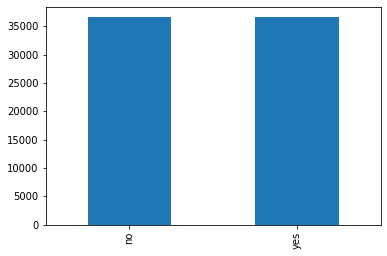

In [62]:
for i in (osdf , usdf , smdf):
    i.y.value_counts().plot(kind = "bar")

plt.show()

In [81]:
df.skew(axis = 0, skipna = True)


age               0.784697
job               0.450818
marital          -0.057136
education        -0.235148
default           1.435659
housing          -0.143783
loan              1.816348
contact           0.559720
month            -0.309755
day_of_week       0.008172
duration          3.263141
campaign          4.762507
pdays            -4.922190
previous          3.832042
poutcome         -0.877789
emp.var.rate     -0.724096
cons.price.idx   -0.230888
cons.conf.idx     0.303180
euribor3m        -0.709188
nr.employed      -1.044262
y                 2.450330
dtype: float64

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'job'}>,
        <AxesSubplot:title={'center':'marital'}>,
        <AxesSubplot:title={'center':'education'}>,
        <AxesSubplot:title={'center':'default'}>],
       [<AxesSubplot:title={'center':'housing'}>,
        <AxesSubplot:title={'center':'loan'}>,
        <AxesSubplot:title={'center':'contact'}>,
        <AxesSubplot:title={'center':'month'}>,
        <AxesSubplot:title={'center':'day_of_week'}>],
       [<AxesSubplot:title={'center':'duration'}>,
        <AxesSubplot:title={'center':'campaign'}>,
        <AxesSubplot:title={'center':'pdays'}>,
        <AxesSubplot:title={'center':'previous'}>,
        <AxesSubplot:title={'center':'poutcome'}>],
       [<AxesSubplot:title={'center':'emp.var.rate'}>,
        <AxesSubplot:title={'center':'cons.price.idx'}>,
        <AxesSubplot:title={'center':'cons.conf.idx'}>,
        <AxesSubplot:title={'center':'euribor3m'}>,
        <AxesSubplot:title={'cen

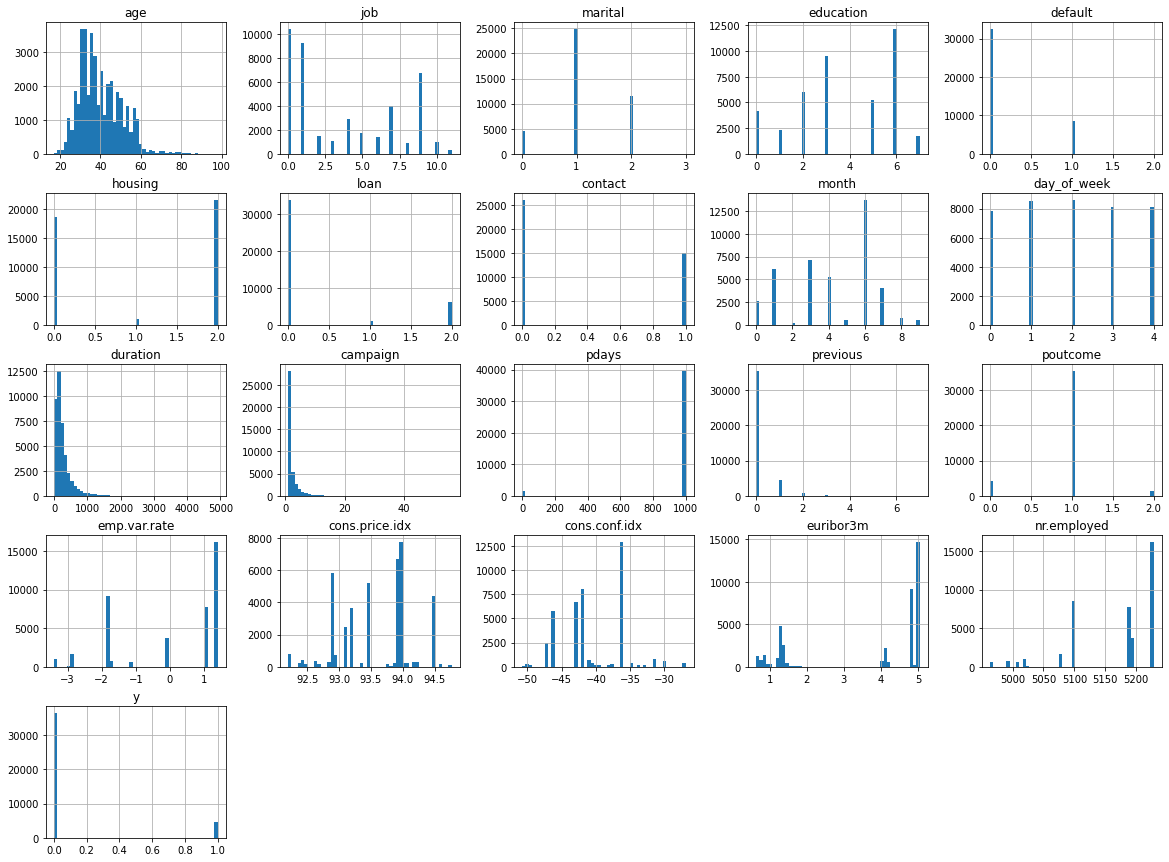

In [88]:
df.hist(figsize= (20 , 15) , bins = 50)

In [92]:
from sklearn.preprocessing import StandardScaler
stsc = StandardScaler()


In [ ]:
pd.DataFrame(stsc.fit_transform(df.iloc[: , 10:14])).hist(figsize= (20 , 15) , bins = 50)

In [134]:
np.log(df.iloc[: , 10:14])
np.isfinite(np.log(df.iloc[: , 10:14])).sum()


duration    41184
campaign    41188
pdays       41173
previous     5625
dtype: int64

In [155]:
unskweddf = np.log(df.iloc[: , 10:13])
unskweddf

,duration,campaign,pdays
0,5.564520,0.000000,6.906755
1,5.003946,0.000000,6.906755
2,5.420535,0.000000,6.906755
3,5.017280,0.000000,6.906755
4,5.726848,0.000000,6.906755
...,...,...,...
41183,5.811141,0.000000,6.906755
41184,5.948035,0.000000,6.906755
41185,5.241747,0.693147,6.906755
41186,6.091310,0.000000,6.906755


In [160]:
df.iloc[: , 10:14].isnull().sum()


duration    0
campaign    0
pdays       0
previous    0
dtype: int64

In [161]:
np.isfinite( df.iloc[: , 10:14]).sum()

duration    41188
campaign    41188
pdays       41188
previous    41188
dtype: int64

In [148]:
np.isfinite(np.log(df.iloc[: , 10:13]))

,duration,campaign,pdays
0,True,True,True
1,True,True,True
2,True,True,True
3,True,True,True
4,True,True,True
...,...,...,...
41183,True,True,True
41184,True,True,True
41185,True,True,True
41186,True,True,True


In [170]:
unskweddf.replace([np.inf, -np.inf], np.nan, inplace=True)

unskweddf.dropna(inplace=True)

In [171]:
np.isfinite(unskweddf).sum()

duration    41169
campaign    41169
pdays       41169
dtype: int64

In [172]:
unskweddf.isnull().sum()

duration    0
campaign    0
pdays       0
dtype: int64

array([[<AxesSubplot:title={'center':'duration'}>,
        <AxesSubplot:title={'center':'campaign'}>],
       [<AxesSubplot:title={'center':'pdays'}>, <AxesSubplot:>]],
      dtype=object)

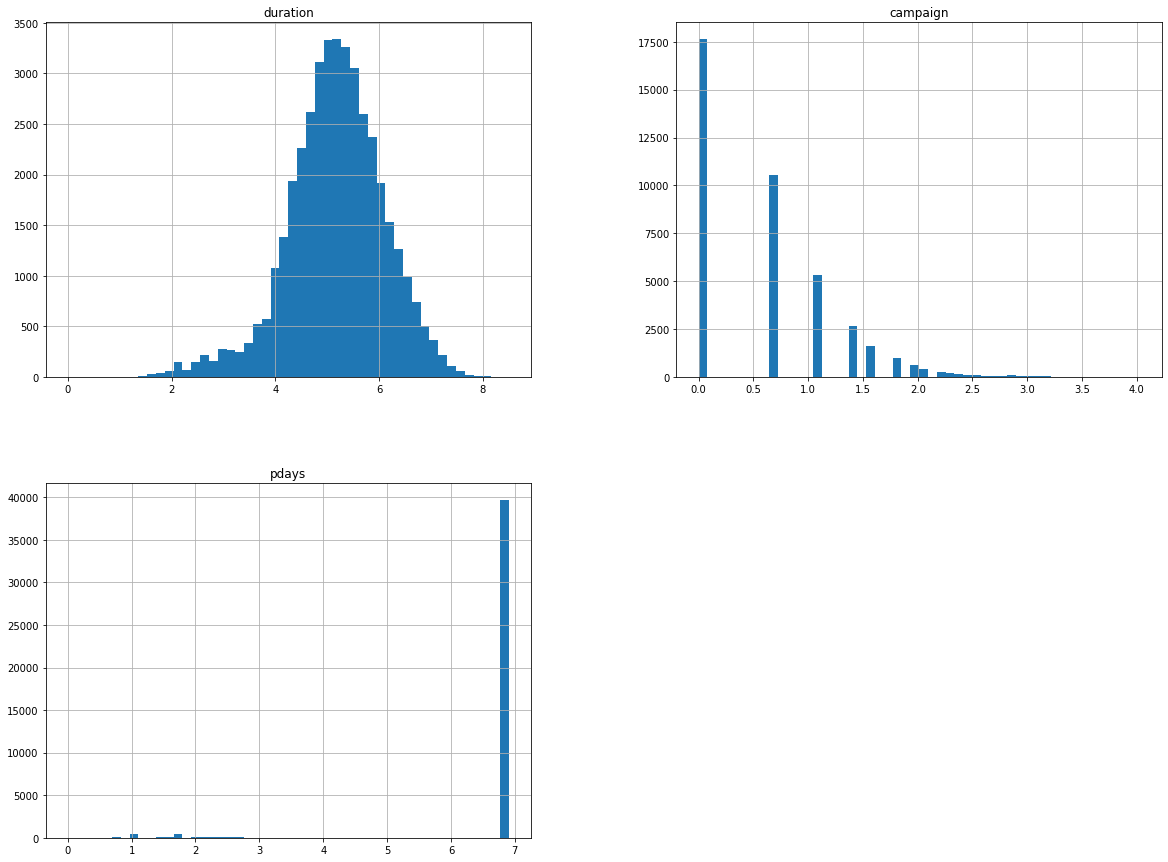

In [175]:
unskweddf.hist(figsize= (20 , 15) , bins = 50)

array([[<AxesSubplot:title={'center':'duration'}>,
        <AxesSubplot:title={'center':'campaign'}>],
       [<AxesSubplot:title={'center':'pdays'}>, <AxesSubplot:>]],
      dtype=object)

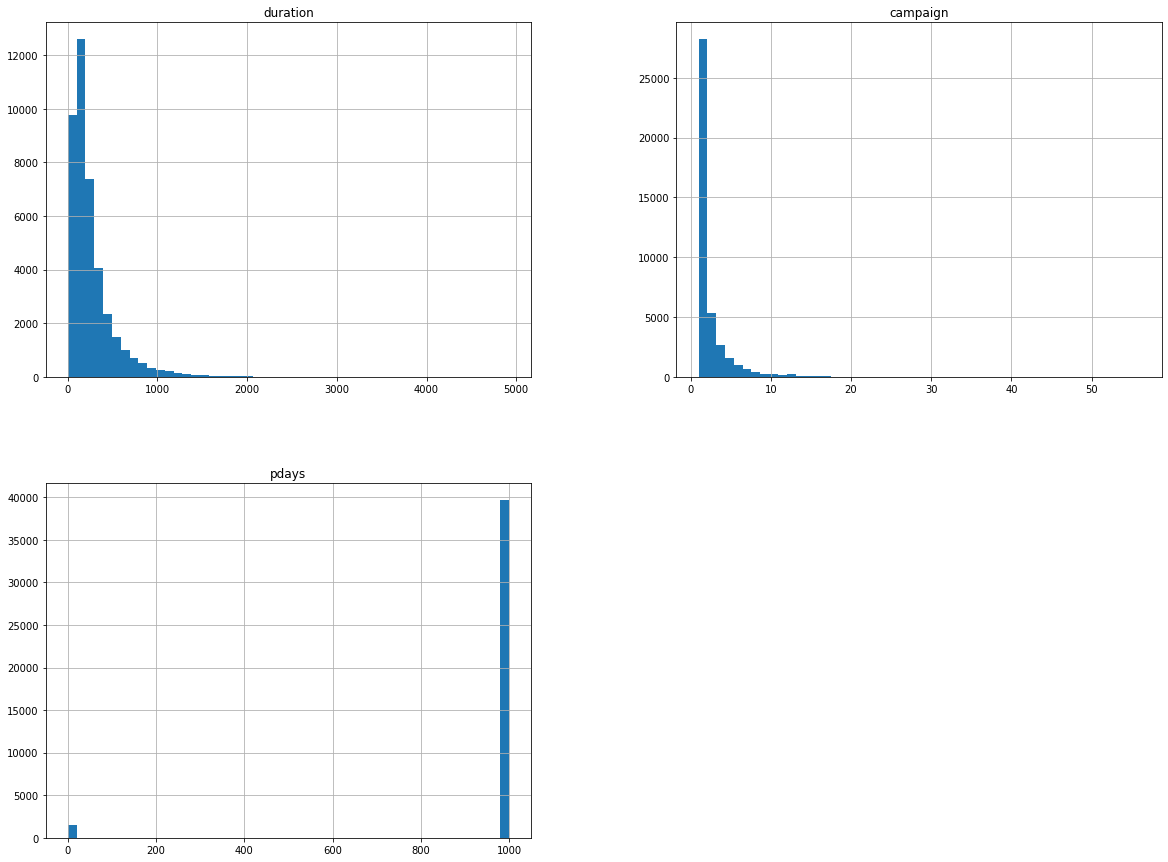

In [224]:
df.iloc[: , 10:13].hist(figsize= (20 , 15) , bins = 50)

In [181]:
df.iloc[: , 10:13].skew()

duration    3.263141
campaign    4.762507
pdays      -4.922190
dtype: float64

In [182]:
unskweddf.skew()

duration   -0.458632
campaign    0.918778
pdays      -5.049073
dtype: float64

In [197]:
np.isfinite(np.sqrt(df.iloc[: , 10:13])).sum()

duration    41188
campaign    41188
pdays       41188
dtype: int64

In [198]:
np.sqrt(df.iloc[: , 10:13]).isna().sum()

duration    0
campaign    0
pdays       0
dtype: int64

In [200]:
np.sqrt(df.iloc[: , 10:13]).skew()

duration    1.199568
campaign    2.168582
pdays      -4.927351
dtype: float64

In [208]:
df.pdays.value_counts()

999    39673
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
22         3
19         3
21         2
25         1
26         1
27         1
20         1
Name: pdays, dtype: int64

<AxesSubplot:>

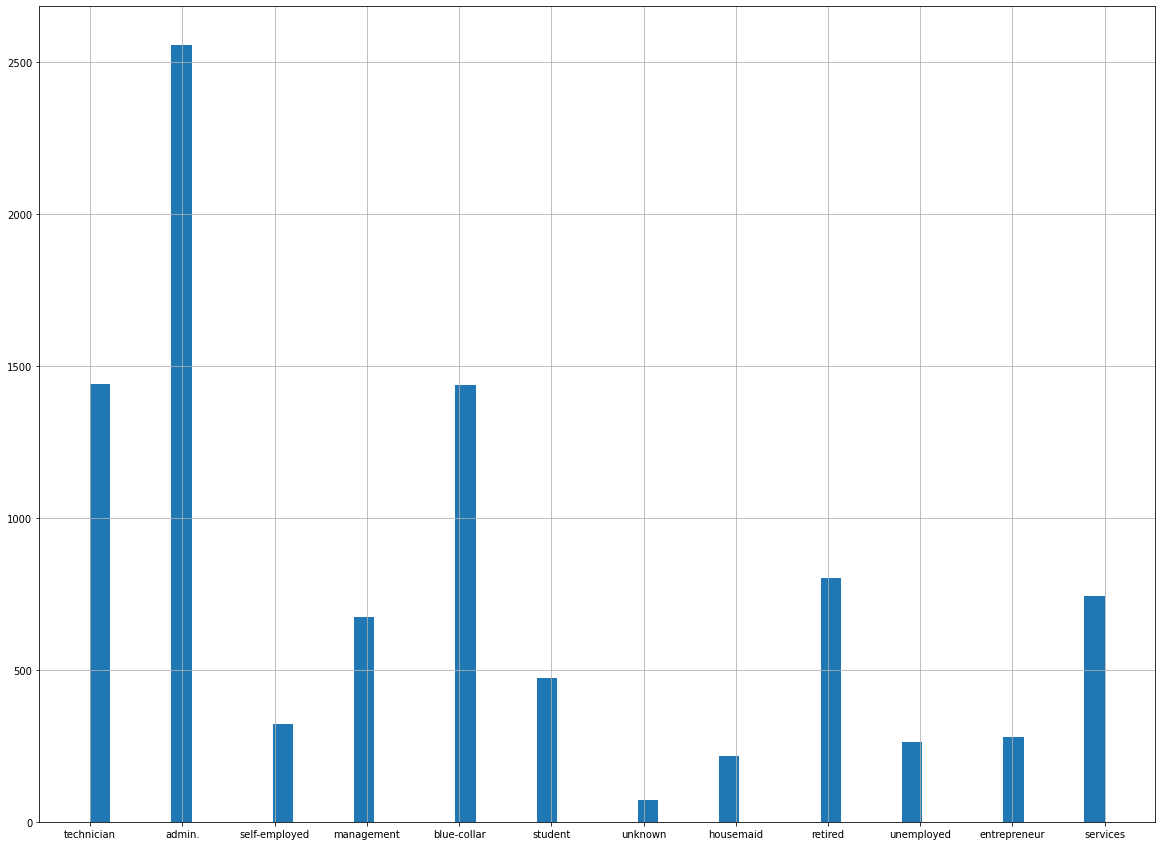

In [219]:
usdf.job.hist(figsize= (20 , 15) , bins = 50)

In [210]:
osdf

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73091,53,housemaid,married,basic.4y,no,yes,no,cellular,jun,tue,...,2,999,0,nonexistent,-2.9,92.963,-40.8,1.252,5076.2,yes
73092,28,admin.,single,university.degree,no,no,no,cellular,jul,thu,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,yes
73093,26,technician,single,professional.course,no,no,no,cellular,jul,thu,...,3,999,2,failure,-1.7,94.215,-40.3,0.899,4991.6,yes
73094,50,admin.,married,high.school,no,yes,no,cellular,oct,thu,...,1,999,0,nonexistent,-1.1,94.601,-49.5,0.987,4963.6,yes
